# Optimizacion
## Programacion Lineal
Problemas de optimización con función objetivo y restricciones de igualdad y desigualdad lineales.

## Problema de generación de electricidad

El problema de optimización consiste en maximizar los ingresos totales de la venta de energía, determinando las horas de producción para los dos generadores.

*El productor vende la electricidad producida a $1 por unidad y por hora.
*Las dos generadoras comparten un sistema de enfriamiento que restringe su operación, con límite superior e inferior.

A continuación se describe en una tabla los valores permitidos para cada crudo por dia.

El problema se puede escribir como el siguiente problema de optimización:


$\begin{array}{ll} & \max _{x_{1}, x_{2}} 12x_{1} + 16x_{2} \\ \text { s.t. } & x_{2} + 2x_{1} \geq 8 \\ & x_{2}+ 2/3 x_{1} \leq 18 \end{array}$

Observamos que el rango de la matriz es 3, la cantidad de filas/columnas linealmente independientes. Para realizar la grafica debemos saber en que rango de valores debemos movernos, para esto asumimos que pasa con la desigualdades cuando hacemos una de las variables cero.

$\begin{array}{ll}  x_{1} \geq 8/2 = 4 & x_{2} \geq 8 = 8 \\  x_{1} \leq (18*3)/2 = 27  &  x_{2} \leq 18 = 18\end{array}$

Ahora realizamos la grafica de la region donde las desigualdades estan definidas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x1 = np.linspace(0,27,500)
x2 = np.linspace(0,18,500)
x1v, x2v = np.meshgrid(x1, x2)

In [ ]:
#funciones para graficar lineas
linea1 = lambda x1: 8 - 2*x1 #x2 => 8 - 2*x1
linea2 = lambda x1: 18 - 2/3*x1 #x2 <= 18 - 2/3*x1

f = lambda x1,x2: 12*x1 + 16*x2

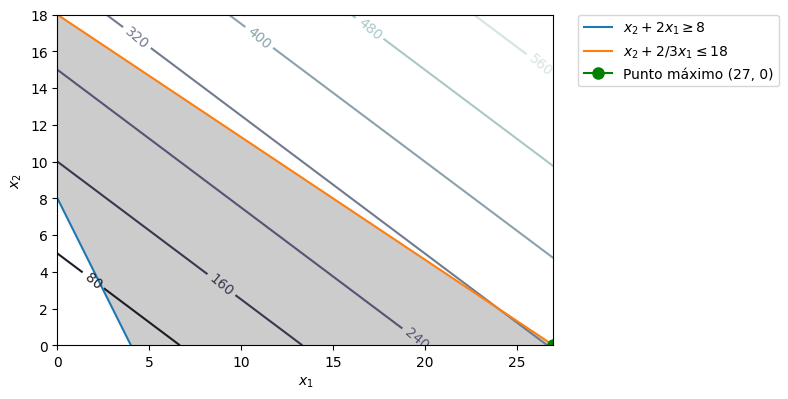

In [ ]:
fig,ax=plt.subplots()
ax.cla()

ax.imshow( ( (x1v>=0.) & (x2v<=18.) & (x2v>=linea1(x1v)) & (x2v<=linea2(x1v)) ).astype(int),
                extent=(x1v.min(),x1v.max(),x2v.min(),x2v.max()),origin="lower", cmap="Greys", alpha = 0.2);

CS = ax.contour(x1v, x2v, f(x1v,x2v), cmap=plt.cm.bone)
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(x1,linea1(x1),label=r'$x_{2}+2 x_{1} \geq 8$')
ax.plot(x1,linea2(x1),label=r'$x_{2}+2/3 x_{1} \leq 18$')
ax.set_xlim([0,27])
ax.set_ylim([0,18])
ax.plot(27, 0, marker='o', markersize=8, color='green', label=r'Punto máximo (27, 0)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

$\begin{array}{ll} & \max 12x_1+16x_2 \\ \text { s.t. } & 2x_1 + x_2 \geq 8 \\ & 2/3x_1 + x_2\leq 18 \end{array}$

$\begin{array}{ll} & \max 12x_1+16x_2 \\ \text { s.t. } & -2x_1 - x_2 \leq -8 \\ & 2/3x_1 + x_2\leq 18 \end{array}$

In [ ]:
from scipy.optimize import linprog

n=2  #Numero de variables
c=np.array([[-12, -16]]).reshape(-1,1)
x0_bounds = (0, None)#x1
x1_bounds = (0, None)#x2
A_ub=np.array([[-2, -1],[2/3, 1]])
b_ub=np.array([[-8,18]]).T


res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x0_bounds, x1_bounds])

res.fun
res.x
#print(res.fun)

#print('Solución a x1 y x2 correspondientemente', res.x)

array([27.,  0.])